In [1]:
import pandas as pd
import re
import os
import numpy as np
import glob
from datetime import datetime
import geopandas as gpd
import json
from shapely.geometry import shape, GeometryCollection
from rasterio.plot import show
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import shutil
import rasterio

%matplotlib widget

In [2]:
json_folder = r"C:\Users\yc463\Documents\JamesLocal\DS\Drone\GEOJSONDATA\GeoJson"
img_folder = r'C:\Users\yc463\Documents\JamesLocal\DS\Drone\GEOJSONDATA\Naver'
tiff_folder = r'C:\Users\yc463\Documents\JamesLocal\DS\Drone\GEOJSONDATA\GeoTiff'

In [3]:
target_courseName = '오너스'

In [19]:
files = glob.glob(os.path.join(tiff_folder,'*.tif'))
files = [x for x in files if target_courseName in x]
files

['C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\오너스GCL14.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\오너스GCL15.tif',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoTiff\\오너스GCL18.tif']

In [20]:
out_tiff = [ x for x in files if 'L18' in x and target_courseName in x][0]

In [15]:
files = glob.glob(os.path.join(json_folder,'*.geojson'))
files = [x for x in files if target_courseName in x]
files

['C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoJson\\오너스GC_그린_.geojson',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoJson\\오너스GC_전면_.geojson',
 'C:\\Users\\yc463\\Documents\\JamesLocal\\DS\\Drone\\GEOJSONDATA\\GeoJson\\오너스GC_홀영역_.geojson']

In [16]:
whole_df = gpd.GeoDataFrame([])
import uuid

for file_ in files:
  gdf = gpd.read_file(file_)
  whole_df = pd.concat([whole_df, gdf])
whole_df = whole_df.reset_index(drop = True)
whole_df['Hole'] = whole_df['Hole'].astype(int)

In [132]:
Hole_df = whole_df.loc[whole_df.Type =='홀영역',:].reset_index(drop = True)
Hole_df['Hole'] = Hole_df['Hole'].astype(int)

In [133]:
Hole_df

,Name,Client,Course,Hole,Type,Valid,geometry
0,Contour_0,오너스GC,TBD,0,홀영역,True,"POLYGON ((127.66190 37.76631, 127.66192 37.766..."
1,Contour_1,오너스GC,TBD,1,홀영역,True,"POLYGON ((127.65869 37.76711, 127.65864 37.767..."
2,Contour_2,오너스GC,TBD,2,홀영역,True,"POLYGON ((127.65837 37.76751, 127.65814 37.767..."
3,Contour_3,오너스GC,TBD,3,홀영역,True,"POLYGON ((127.66293 37.76777, 127.66282 37.767..."
4,Contour_4,오너스GC,TBD,4,홀영역,True,"POLYGON ((127.65782 37.76775, 127.65763 37.767..."
5,Contour_5,오너스GC,TBD,5,홀영역,True,"POLYGON ((127.66204 37.76805, 127.66194 37.767..."
6,Contour_6,오너스GC,TBD,6,홀영역,True,"POLYGON ((127.66122 37.76825, 127.66116 37.768..."
7,Contour_7,오너스GC,TBD,7,홀영역,True,"POLYGON ((127.65929 37.76819, 127.65924 37.768..."
8,Contour_8,오너스GC,TBD,8,홀영역,True,"POLYGON ((127.65642 37.76807, 127.65619 37.768..."
9,Contour_9,오너스GC,TBD,9,홀영역,True,"POLYGON ((127.65952 37.76859, 127.65948 37.768..."


In [134]:
import rasterio
import cv2

# with rasterio.open(out_tiff, mode='r+') as dataset:
src= rasterio.open(out_tiff, mode='r+')
  # image_org = image_org.transpose(1, 2, 0) #RGB

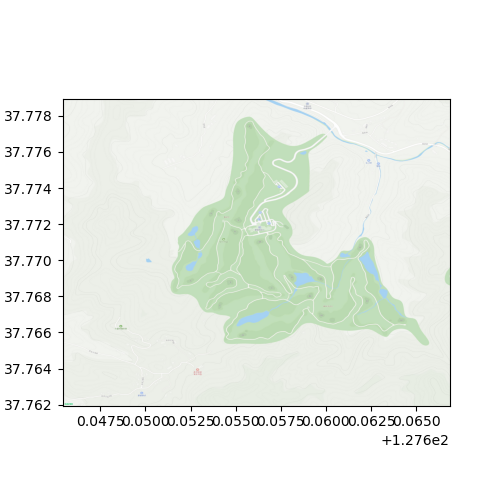

In [135]:
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show(src.read(), transform=src.transform)
ax = Hole_df.plot(ax=ax, facecolor='none', edgecolor='red')
Hole_df.apply(lambda x: ax.annotate(text=x['Hole'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

# df.plot()
# Hole_df.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

In [164]:
Hole_df.shape

(19, 7)

In [161]:
Hole_to_merge = [0,5]

# Hole_df[~Hole_df.Hole.isin(Hole_to_merge)]
# Hole_df = pd.concat([Hole_df[~Hole_df.Hole.isin(Hole_to_merge)],Hole_df[Hole_df.Hole.isin(Hole_to_merge)].dissolve(by='Type').convex_hull])

In [162]:
Hole_df.loc[Hole_df.Hole==Hole_to_merge[-1],'geometry'] = \
  Hole_df[Hole_df.Hole.isin(Hole_to_merge)].dissolve(by='Type').convex_hull.reset_index().set_geometry(0).iloc[0,-1]
Hole_df = Hole_df.loc[~Hole_df.Hole.isin(Hole_to_merge[:-1])]

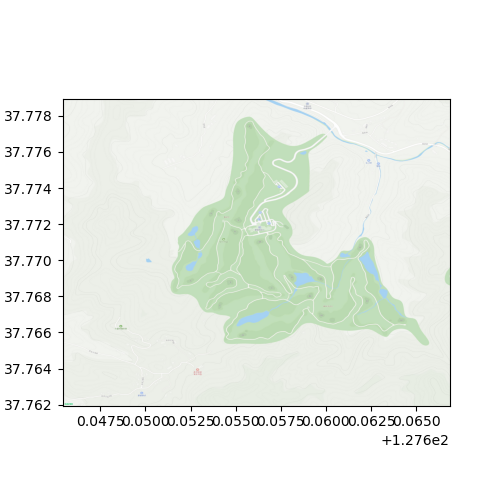

In [163]:
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show(src.read(), transform=src.transform)
ax = Hole_df.plot(ax=ax, facecolor='none', edgecolor='red')
Hole_df.apply(lambda x: ax.annotate(text=x['Hole'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

In [166]:
import fiona
with fiona.Env(OSR_WKT_FORMAT="WKT2_2018"):
  Hole_df.to_file(os.path.join(json_folder,os.path.split(out_tiff)[-1].split('L')[0]+'_홀영역_'+'.geojson'), driver='GeoJSON')